In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import matplotlib.pyplot as plt

In [ ]:
# 파일 업로드  colab 사용하여 파일 업로드 필요합니다. tarin.csv 파일을 업로드해주세요!
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
# 데이터 로드  train.csv 파일을 로드해주세요
df = pd.read_csv('train.csv')

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,16,U,LE3,T,4,2,teacher,other,...,4,5,1,1,3,5,2,15,15,16
1,GP,M,15,U,GT3,T,4,4,services,services,...,4,3,1,1,1,5,0,17,16,17
2,GP,M,18,U,LE3,T,3,3,services,health,...,3,2,4,2,4,4,13,6,6,8
3,GP,F,16,U,GT3,T,2,3,services,teacher,...,2,3,1,1,1,3,2,16,16,17
4,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,3,3,2,3,5,6,9,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,GP,F,16,U,GT3,T,2,1,other,other,...,4,3,5,1,1,5,2,8,9,10
313,GP,F,17,U,GT3,T,4,3,health,services,...,4,2,2,1,2,3,0,15,15,15
314,GP,M,16,U,LE3,T,2,2,other,other,...,5,4,4,2,4,5,0,13,13,12
315,GP,M,18,U,GT3,T,4,2,teacher,other,...,4,3,2,1,4,5,11,12,11,11


In [ ]:
# 데이터 전처리
df = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize',
                                 'Pstatus', 'Mjob', 'Fjob', 'reason',
                                 'guardian', 'schoolsup', 'famsup',
                                 'paid', 'activities', 'nursery',
                                 'higher', 'internet', 'romantic'])

# True, False를 1, 0으로 변환
df = df.astype(int)

In [ ]:
df_cp = df.copy()
df_cp['age'].iloc[[0, 1, 2]] = None
df_cp['test_str'] = 'student!'
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                314 non-null    float64
 1   Medu               317 non-null    int64  
 2   Fedu               317 non-null    int64  
 3   traveltime         317 non-null    int64  
 4   studytime          317 non-null    int64  
 5   failures           317 non-null    int64  
 6   famrel             317 non-null    int64  
 7   freetime           317 non-null    int64  
 8   goout              317 non-null    int64  
 9   Dalc               317 non-null    int64  
 10  Walc               317 non-null    int64  
 11  health             317 non-null    int64  
 12  absences           317 non-null    int64  
 13  G1                 317 non-null    int64  
 14  G2                 317 non-null    int64  
 15  G3                 317 non-null    int64  
 16  school_GP          317 non

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                317 non-null    int64
 1   Medu               317 non-null    int64
 2   Fedu               317 non-null    int64
 3   traveltime         317 non-null    int64
 4   studytime          317 non-null    int64
 5   failures           317 non-null    int64
 6   famrel             317 non-null    int64
 7   freetime           317 non-null    int64
 8   goout              317 non-null    int64
 9   Dalc               317 non-null    int64
 10  Walc               317 non-null    int64
 11  health             317 non-null    int64
 12  absences           317 non-null    int64
 13  G1                 317 non-null    int64
 14  G2                 317 non-null    int64
 15  G3                 317 non-null    int64
 16  school_GP          317 non-null    int64
 17  school_MS       

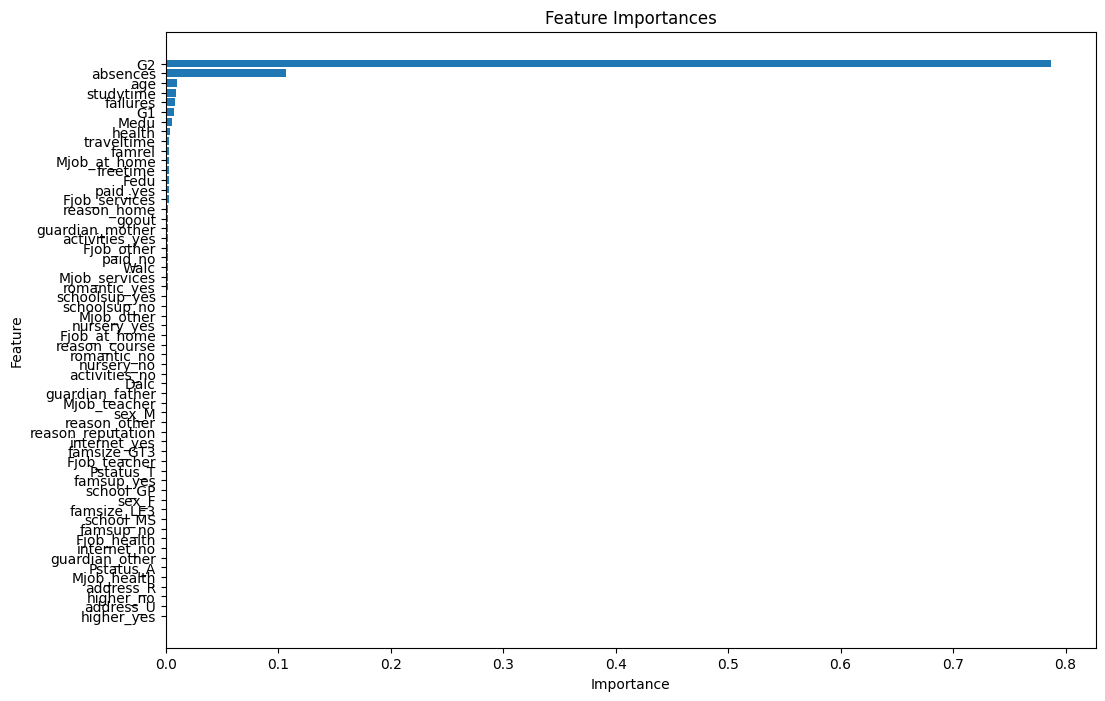

In [ ]:
# 데이터 입력 및 목표 변수 설정
data_input = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
                 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
                 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
                 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
                 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                 'reason_other', 'reason_reputation', 'guardian_father',
                 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
                 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
                 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
                 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
                 'romantic_yes']]
data_target = df['G3']

# 훈련 데이터와 테스트 데이터 분할
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=725
)

# 데이터 정규화
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)

# 랜덤 포레스트 모델을 사용하여 특성 중요도 계산
rf = RandomForestRegressor(random_state=725)
rf.fit(train_scaled, train_target)

# 특성 중요도 추출
importances = rf.feature_importances_
feature_names = data_input.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# 데이터 준비
data_input = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
                 'sex_F', 'sex_M',
                 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
                 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                 'reason_other', 'reason_reputation', 'guardian_father',
                 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
                 'paid_no', 'paid_yes', 'activities_no',
                 'activities_yes', 'nursery_no', 'nursery_yes', 'romantic_no',
                 'romantic_yes']].to_numpy()

data_target = df['G3'].to_numpy()

# 데이터 분할
train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
test_input_scaled = scaler.transform(test_input)

In [ ]:
# XGBoost 모델 학습 및 평가
xgb_model = XGBRegressor(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'alpha': [0, 0.1, 0.5],
    'lambda': [1, 1.5, 2]
}

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid,
                               cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

xgb_grid_search.fit(train_input_scaled, train_target)

best_xgb_model = xgb_grid_search.best_estimator_

# 최적 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", xgb_grid_search.best_params_)

# 최적 모델 성능 평가
xgb_train_score = best_xgb_model.score(train_input_scaled, train_target)
xgb_test_score = best_xgb_model.score(test_input_scaled, test_target)
print("최적 XGBoost 트레이닝 데이터 정확도:", xgb_train_score)
print("최적 XGBoost 테스트 데이터 정확도:", xgb_test_score)

# 최적 모델의 교차 검증 점수
xgb_cv_scores = cross_val_score(best_xgb_model, scaler.transform(data_input), data_target, cv=10)
print("최적 XGBoost 교차 검증 점수:", xgb_cv_scores)
print("최적 XGBoost 교차 검증 평균 점수:", xgb_cv_scores.mean())

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
최적의 하이퍼파라미터: {'alpha': 0.5, 'colsample_bytree': 1.0, 'lambda': 2, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
최적 XGBoost 트레이닝 데이터 정확도: 0.9960845329367554
최적 XGBoost 테스트 데이터 정확도: 0.9229600694723564
최적 XGBoost 교차 검증 점수: [0.91925512 0.94248198 0.84745762 0.8055808  0.86281655 0.86442426
 0.95667536 0.85682552 0.69795234 0.64525067]
최적 XGBoost 교차 검증 평균 점수: 0.8398720223601203


<Figure size 1200x800 with 0 Axes>

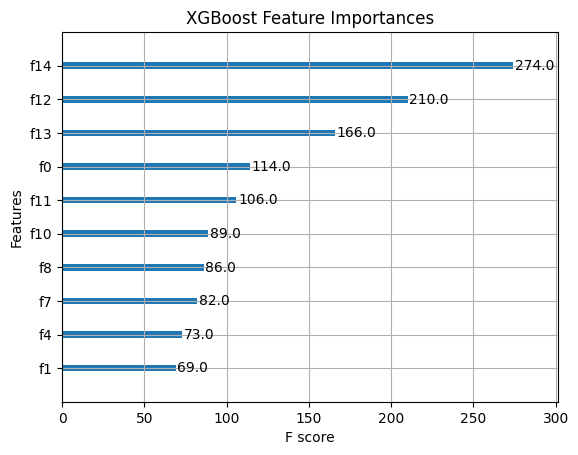

              Feature  Importance
14                 G2    0.536083
12           absences    0.126987
6              famrel    0.037233
0                 age    0.024131
11             health    0.021162
20      Mjob_services    0.017564
19         Mjob_other    0.017476
4           studytime    0.017185
27      reason_course    0.015216
3          traveltime    0.014667
13                 G1    0.014301
2                Fedu    0.014294
25      Fjob_services    0.013312
7            freetime    0.012785
10               Walc    0.011042
5            failures    0.010651
38      activities_no    0.010102
8               goout    0.007664
17       Mjob_at_home    0.007094
40         nursery_no    0.006790
28        reason_home    0.006775
34       schoolsup_no    0.006370
31    guardian_father    0.005857
32    guardian_mother    0.005601
36            paid_no    0.005563
24         Fjob_other    0.004297
1                Medu    0.004226
15              sex_F    0.004117
42        roma

In [ ]:
# 특성 중요도 분석
best_xgb_model.fit(train_input_scaled, train_target)
feature_importances = best_xgb_model.feature_importances_
feature_names = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
                 'sex_F', 'sex_M',
                 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
                 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                 'reason_other', 'reason_reputation', 'guardian_father',
                 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
                 'paid_no', 'paid_yes', 'activities_no',
                 'activities_yes', 'nursery_no', 'nursery_yes', 'romantic_no',
                 'romantic_yes']].columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
plot_importance(best_xgb_model, max_num_features=10)
plt.title('XGBoost Feature Importances')
plt.show()

# 중요도 데이터프레임 출력
print(importance_df)


In [ ]:
# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_input_scaled, train_target)

# 앙상블 모델 생성
ensemble_model = VotingRegressor(estimators=[('xgb', best_xgb_model), ('rf', rf_model)])
ensemble_model.fit(train_input_scaled, train_target)

# 앙상블 모델 평가
ensemble_train_score = ensemble_model.score(train_input_scaled, train_target)
ensemble_test_score = ensemble_model.score(test_input_scaled, test_target)
ensemble_cv_scores = cross_val_score(ensemble_model, scaler.transform(data_input), data_target, cv=10)
ensemble_cv_mean_score = ensemble_cv_scores.mean()

print("앙상블 모델 트레이닝 데이터 정확도:", ensemble_train_score)
print("앙상블 모델 테스트 데이터 정확도:", ensemble_test_score)
print("앙상블 모델 교차 검증 점수:", ensemble_cv_scores)
print("앙상블 모델 교차 검증 평균 점수:", ensemble_cv_mean_score)


앙상블 모델 트레이닝 데이터 정확도: 0.990423485744668
앙상블 모델 테스트 데이터 정확도: 0.9188035751894423
앙상블 모델 교차 검증 점수: [0.90671996 0.94954675 0.8751962  0.83949074 0.87226058 0.86800572
 0.95117758 0.85162016 0.70393467 0.70766152]
앙상블 모델 교차 검증 평균 점수: 0.8525613870121381


In [ ]:
uploaded = files.upload() #test.xlsx 파일을 업로드 해주세요

Saving test.xlsx to test (1).xlsx


In [ ]:
# test.xlsx 파일 읽기
test_df = pd.read_excel('test.xlsx')

# 학습 데이터와 동일한 방식으로 전처리
test_df = pd.get_dummies(test_df, columns=['school', 'sex', 'address', 'famsize',
                                 'Pstatus', 'Mjob', 'Fjob', 'reason',
                                 'guardian', 'schoolsup', 'famsup',
                                 'paid', 'activities', 'nursery',
                                 'higher', 'internet', 'romantic'])

test_df = test_df.astype(int)

test_input = test_df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
                 'sex_F', 'sex_M',
                 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
                 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
                 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
                 'reason_other', 'reason_reputation', 'guardian_father',
                 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
                 'paid_no', 'paid_yes', 'activities_no',
                 'activities_yes', 'nursery_no', 'nursery_yes', 'romantic_no',
                 'romantic_yes']].to_numpy()

test_target = test_df['G3'].to_numpy()

# 학습된 모델로 테스트 데이터 예측
test_pred = ensemble_model.predict(scaler.transform(test_input))

# 테스트 데이터 정확도 확인
test_score = ensemble_model.score(scaler.transform(test_input), test_target)
print("테스트 데이터 정확도:", test_score)


테스트 데이터 정확도: 0.9191540933195758
